#  Lab 7 
## 20180067

In [7]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
import matplotlib.pyplot as plt

Se realizó una matriz con los usuarios como observaciónes y en las columnas se ubican las peliculas que han sido calificadas. 
Se coloco 0 en todas aquellas peliculas que el usuario no ha calificado. 

In [8]:
data = pd.read_csv('raitings_consolidados.csv')
data.head(5)

,Usuario,2,3,5,6,11,12,13,14,15,...,134158,134368,134569,134881,135536,140174,142507,148652,158238,160718
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0
4,5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0


In [14]:
data = data.assign(v_1 = 1)
Y = data[['Usuario']].to_numpy()
Xo = data.to_numpy()
Xo =  np.delete(Xo, 0, axis=1)
print(Y.shape)
print(Xo.shape)

(671, 1)
(671, 2831)


In [16]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(Xo, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(402, 2831)
(135, 2831)
(134, 2831)
(402, 1)
(135, 1)
(134, 1)


In [17]:
def linear_cost(X, y, theta): 
    h = X @ theta
    return ((y-h)**2).sum() / (2 * len(X))

def linear_cost_gradient(X, y, theta): 
    h = X @ theta
    return (X.T @ (h-y))/ len(X)

In [18]:
m, n = X_train.shape

In [19]:
theta_0 = np.random.rand(n,1)
print(theta_0.shape)

(2831, 1)


In [20]:
def gradient_descent(
X,y,theta_0,linear_cost,linear_cost_gradient,
    learning_rate = 0.000000001, threshold = 0.00001, max_iter=10000):
    thetas = theta_0
    iteration = 0 
    costs = []
    
    while np.linalg.norm(linear_cost_gradient(X,y,thetas)) > threshold and iteration < max_iter:
        iteration += 1 
        thetas = thetas - (learning_rate * linear_cost_gradient(X,y,thetas))
        costs.append(linear_cost(X,y,thetas))
        
    return thetas, costs

In [21]:
thetas, costs = gradient_descent(X_train,y_train,theta_0,linear_cost,linear_cost_gradient)

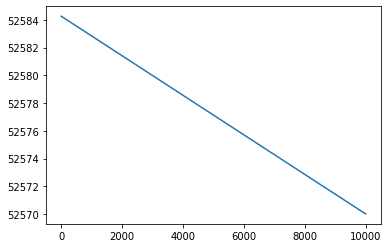

In [22]:
plt.plot(costs)

### test

In [23]:
thetas, costs = gradient_descent(X_test,y_test,theta_0,linear_cost,linear_cost_gradient)

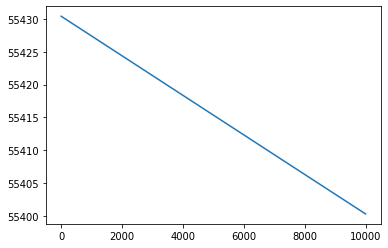

In [24]:
plt.plot(costs)

### validation

In [25]:
thetas, costs = gradient_descent(X_val,y_val,theta_0,linear_cost,linear_cost_gradient)

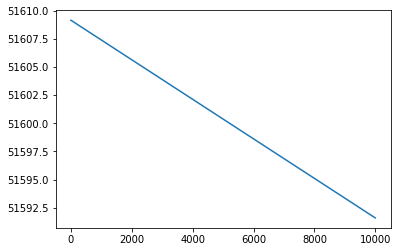

In [26]:
plt.plot(costs)

Se realizó la regresión múltiple para tratar de organizar y preedcir la forma en que los usuarios realizan las prediccións, y obtener los valores tetha correspondientes.

In [32]:
def adam(
        Y,
        Xo,
        To,
        fun,
        jac,
        alpha=0.001,
        beta1=0.9,
        beta2=0.999,
        epsilon=0.0000001,
        max_iter=1000
):
    xm = cp.zeros(Xo.shape)
    tm = cp.zeros(To.shape)

    xv = cp.zeros(Xo.shape)
    tv = cp.zeros(To.shape)

    X, T, t = Xo, To, 0

    while t < max_iter:
        t += 1

        xg, tg = jac(Y, X, T)

        print(f'{t} \t loss={fun(Y, X, T).item():,.2f}')

        xm = beta1 * xm + (1 - beta1) * xg
        tm = beta1 * tm + (1 - beta1) * tg

        xv = beta2 * xv + (1 - beta2) * xg * xg
        tv = beta2 * tv + (1 - beta2) * tg * tg

        xmh = xm / (1 - beta1 ** t)
        tmh = tm / (1 - beta1 ** t)

        xvh = xv / (1 - beta2 ** t)
        tvh = tv / (1 - beta2 ** t)

        X -= alpha * xmh / (cp.sqrt(xvh) + epsilon)
        T -= alpha * tmh / (cp.sqrt(tvh) + epsilon)

    return X, T


In [34]:
#User , teth = adam(
#        Y,
#        X_val,
#        thetas,
#        gradient_descent,
#        X_val,
#        alpha=0.001,
#        beta1=0.9,
#        beta2=0.999,
#        epsilon=0.0000001,
#        max_iter=1000
#)

El valor del tetha de cada usuario corresponde al sistema de recomendación respectivo a este. Es decir que cada usuario recibirá la peliculas que usuarios similares a el hayan puntuado alto, por el método de Collaborative Filtering